<a href="https://colab.research.google.com/github/albs-br/tcc-machine-vision/blob/main/TCC_teste_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [4]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [5]:
frames_dir = "frames/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)  

if not os.path.exists(features_dir):
    os.makedirs(features_dir)  
  
if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)  

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

In [6]:
# limpar diretórios de saída

for f in os.listdir(features_dir):
    if not f.endswith(".brief"):    #if os.path.isdir(f):
        continue
    os.remove(os.path.join(features_dir, f))

for f in os.listdir(cluster_dir):
    if not f.endswith(".cluster"):
        continue
    os.remove(os.path.join(cluster_dir, f))

for f in os.listdir(bow_dir):
    if not f.endswith(".bow"):
        continue
    os.remove(os.path.join(bow_dir, f))

Mostrar imagem exemplo:


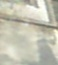

In [9]:
#Mostrar imagem:
#path = '/content/drive/MyDrive/Pós IA PUC MInas/TCC/Selected Pics/UFPR04/Sunny/2012-12-07/'
path = '/content/drive/MyDrive/Pós IA PUC MInas/TCC/Imagens selecionadas/UFPR04/016/'
#frame = cv2.imread(path + 'Empty/2012-12-07_17_17_25#016.jpg')
frame = cv2.imread(path + 'Empty_Cloudy_2012-12-14_16_55_13#016.jpg')
# frame = cv2.imread(path + 'Occupied/2012-12-07_17_12_25#016.jpg')
#frame = cv2.imread('/content/20150703_0805_10.jpg')

cv2_imshow(frame)

Passo 1: calcular arquivos de vetor de features (.brief) para cada imagem

imagem: 2012-12-07_17_17_25#016.jpg


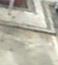

número de features (keypoints) encontradas: 20
formato (keypoints, dimensões): (20, 32)


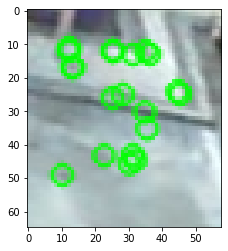

----------------------------------------
imagem: 2012-12-07_17_22_25#016.jpg


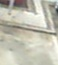

número de features (keypoints) encontradas: 22
formato (keypoints, dimensões): (22, 32)


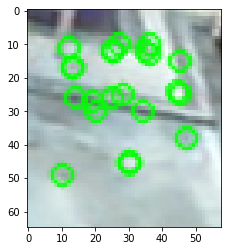

----------------------------------------
imagem: 2012-12-07_17_27_25#016.jpg


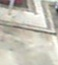

número de features (keypoints) encontradas: 22
formato (keypoints, dimensões): (22, 32)


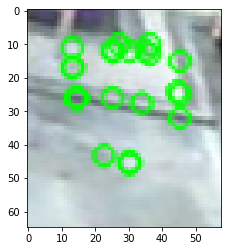

----------------------------------------
imagem: 2012-12-07_17_32_25#016.jpg


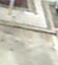

número de features (keypoints) encontradas: 15
formato (keypoints, dimensões): (15, 32)


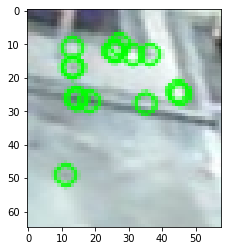

----------------------------------------
imagem: 2012-12-07_17_37_25#016.jpg


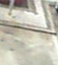

número de features (keypoints) encontradas: 30
formato (keypoints, dimensões): (30, 32)


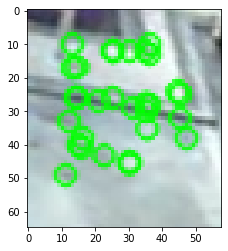

----------------------------------------
imagem: 2012-12-07_17_42_25#016.jpg


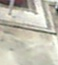

número de features (keypoints) encontradas: 28
formato (keypoints, dimensões): (28, 32)


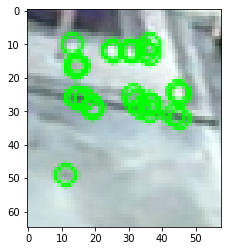

----------------------------------------
imagem: 2012-12-07_17_47_26#016.jpg


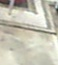

número de features (keypoints) encontradas: 24
formato (keypoints, dimensões): (24, 32)


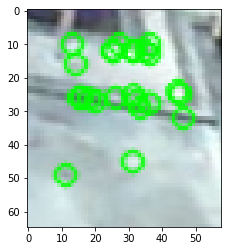

----------------------------------------
imagem: 2012-12-07_17_52_26#016.jpg


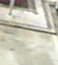

número de features (keypoints) encontradas: 30
formato (keypoints, dimensões): (30, 32)


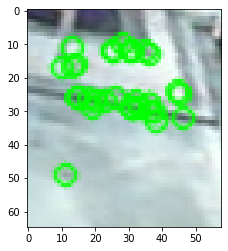

----------------------------------------
imagem: 2012-12-07_17_57_26#016.jpg


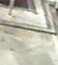

número de features (keypoints) encontradas: 31
formato (keypoints, dimensões): (31, 32)


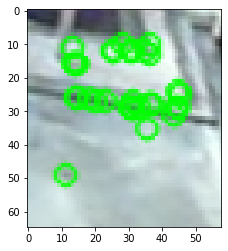

----------------------------------------
imagem: 2012-12-07_18_02_26#016.jpg


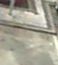

número de features (keypoints) encontradas: 32
formato (keypoints, dimensões): (32, 32)


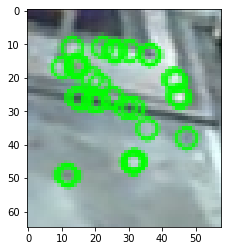

----------------------------------------
imagem: 2012-12-07_18_07_26#016.jpg


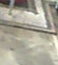

número de features (keypoints) encontradas: 29
formato (keypoints, dimensões): (29, 32)


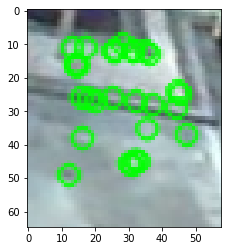

----------------------------------------
imagem: 2012-12-07_18_12_26#016.jpg


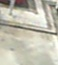

número de features (keypoints) encontradas: 37
formato (keypoints, dimensões): (37, 32)


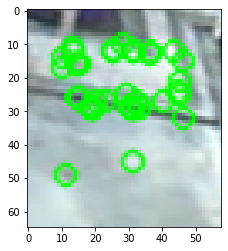

----------------------------------------
imagem: 2012-12-07_18_27_26#016.jpg


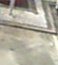

número de features (keypoints) encontradas: 40
formato (keypoints, dimensões): (40, 32)


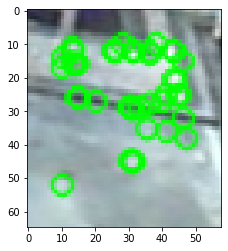

----------------------------------------
imagem: 2012-12-07_18_32_26#016.jpg


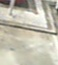

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


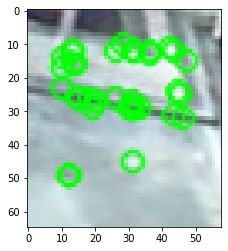

----------------------------------------
imagem: 2012-12-07_18_37_26#016.jpg


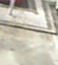

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


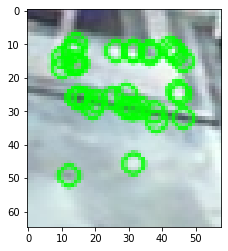

----------------------------------------
imagem: 2012-12-07_18_42_26#016.jpg


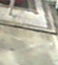

número de features (keypoints) encontradas: 45
formato (keypoints, dimensões): (45, 32)


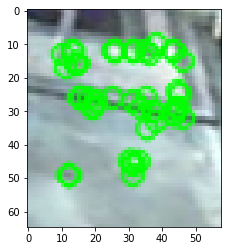

----------------------------------------
imagem: 2012-12-07_18_47_27#016.jpg


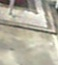

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


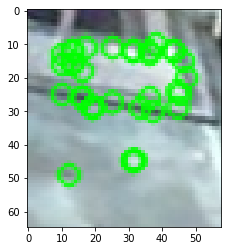

----------------------------------------
imagem: 2012-12-07_18_52_27#016.jpg


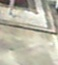

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


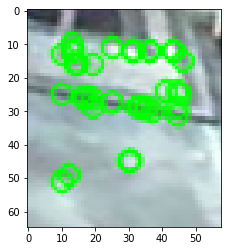

----------------------------------------
imagem: 2012-12-07_18_57_27#016.jpg


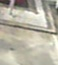

número de features (keypoints) encontradas: 31
formato (keypoints, dimensões): (31, 32)


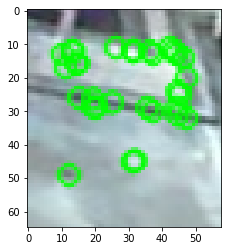

----------------------------------------
imagem: 2012-12-07_19_17_27#016.jpg


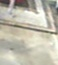

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


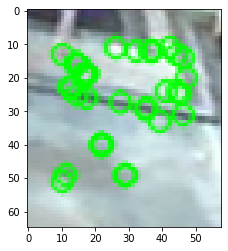

----------------------------------------
imagem: 2012-12-07_19_22_27#016.jpg


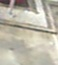

número de features (keypoints) encontradas: 35
formato (keypoints, dimensões): (35, 32)


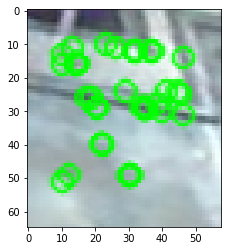

----------------------------------------
imagem: 2012-12-07_19_27_27#016.jpg


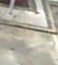

número de features (keypoints) encontradas: 34
formato (keypoints, dimensões): (34, 32)


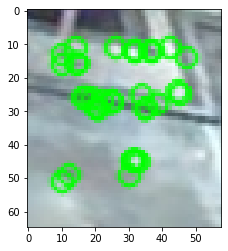

----------------------------------------
imagem: 2012-12-07_19_32_27#016.jpg


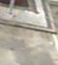

número de features (keypoints) encontradas: 26
formato (keypoints, dimensões): (26, 32)


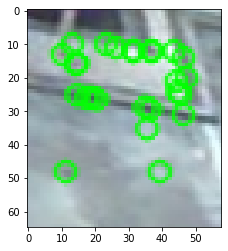

----------------------------------------
imagem: 2012-12-07_19_37_28#016.jpg


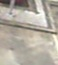

número de features (keypoints) encontradas: 24
formato (keypoints, dimensões): (24, 32)


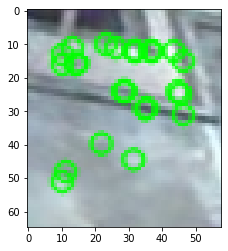

----------------------------------------
imagem: 2012-12-07_19_42_28#016.jpg


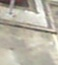

número de features (keypoints) encontradas: 29
formato (keypoints, dimensões): (29, 32)


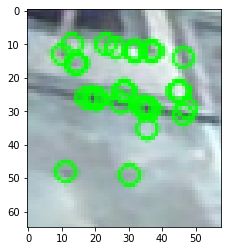

----------------------------------------
imagem: 2012-12-07_19_47_28#016.jpg


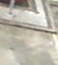

número de features (keypoints) encontradas: 31
formato (keypoints, dimensões): (31, 32)


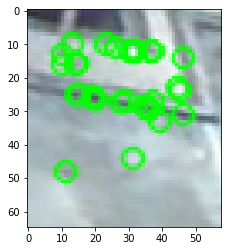

----------------------------------------
imagem: 2012-12-07_19_52_28#016.jpg


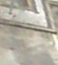

número de features (keypoints) encontradas: 23
formato (keypoints, dimensões): (23, 32)


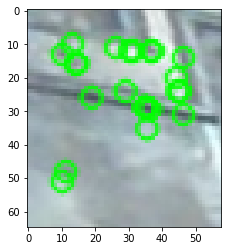

----------------------------------------
imagem: 2012-12-07_19_57_28#016.jpg


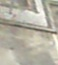

número de features (keypoints) encontradas: 26
formato (keypoints, dimensões): (26, 32)


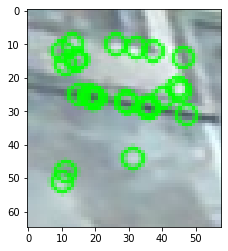

----------------------------------------
imagem: 2012-12-07_20_02_28#016.jpg


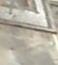

número de features (keypoints) encontradas: 30
formato (keypoints, dimensões): (30, 32)


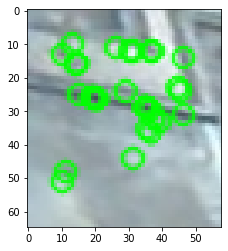

----------------------------------------
imagem: 2012-12-07_20_07_28#016.jpg


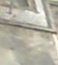

número de features (keypoints) encontradas: 25
formato (keypoints, dimensões): (25, 32)


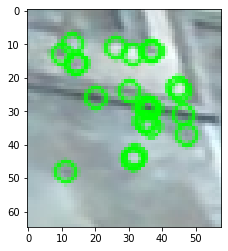

----------------------------------------
imagem: 2012-12-07_20_12_28#016.jpg


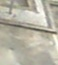

número de features (keypoints) encontradas: 24
formato (keypoints, dimensões): (24, 32)


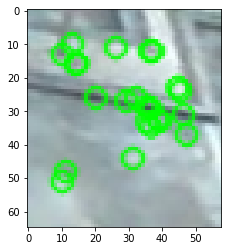

----------------------------------------
imagem: 2012-12-07_20_17_28#016.jpg


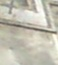

número de features (keypoints) encontradas: 18
formato (keypoints, dimensões): (18, 32)


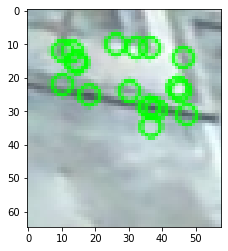

----------------------------------------
imagem: 2012-12-07_20_22_28#016.jpg


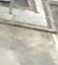

número de features (keypoints) encontradas: 26
formato (keypoints, dimensões): (26, 32)


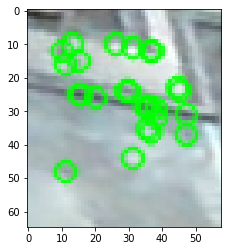

----------------------------------------
imagem: 2012-12-07_20_27_28#016.jpg


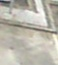

número de features (keypoints) encontradas: 22
formato (keypoints, dimensões): (22, 32)


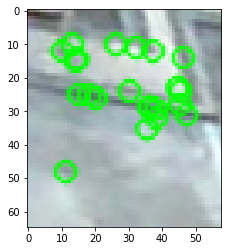

----------------------------------------
imagem: 2012-12-07_20_32_28#016.jpg


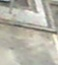

número de features (keypoints) encontradas: 19
formato (keypoints, dimensões): (19, 32)


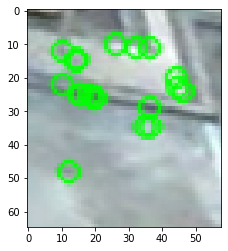

----------------------------------------
imagem: 2012-12-07_20_37_29#016.jpg


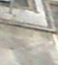

número de features (keypoints) encontradas: 22
formato (keypoints, dimensões): (22, 32)


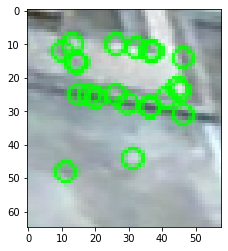

----------------------------------------
imagem: 2012-12-07_20_42_29#016.jpg


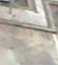

número de features (keypoints) encontradas: 28
formato (keypoints, dimensões): (28, 32)


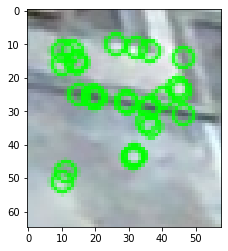

----------------------------------------
imagem: occupied 2012-12-07_19_12_27#016.jpg


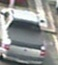

número de features (keypoints) encontradas: 68
formato (keypoints, dimensões): (68, 32)


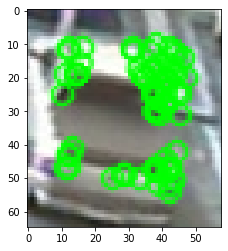

----------------------------------------
imagem: occupied 2012-12-07_18_22_26#016.jpg


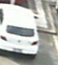

número de features (keypoints) encontradas: 61
formato (keypoints, dimensões): (61, 32)


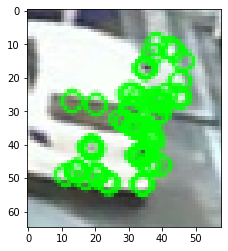

----------------------------------------
imagem: occupied 2012-12-07_17_12_25#016.jpg


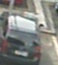

número de features (keypoints) encontradas: 88
formato (keypoints, dimensões): (88, 32)


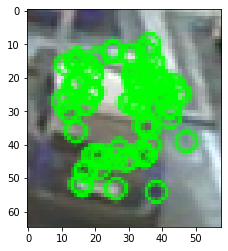

----------------------------------------
imagem: occupied 2012-12-07_19_07_27#016.jpg


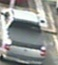

número de features (keypoints) encontradas: 76
formato (keypoints, dimensões): (76, 32)


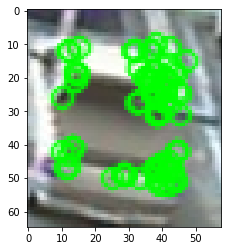

----------------------------------------
imagem: occupied 2012-12-07_19_02_27#016.jpg


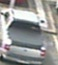

número de features (keypoints) encontradas: 76
formato (keypoints, dimensões): (76, 32)


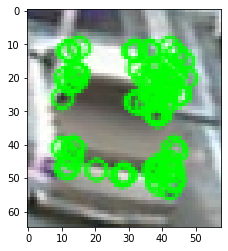

----------------------------------------
imagem: occupied 2012-12-07_18_17_26#016.jpg


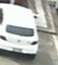

número de features (keypoints) encontradas: 67
formato (keypoints, dimensões): (67, 32)


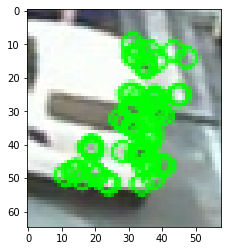

----------------------------------------
CPU times: user 6.59 s, sys: 161 ms, total: 6.75 s
Wall time: 7.09 s


In [138]:
%%time
frames_dir = path + 'All'
#frames_dir = path + 'Empty'
#frames_dir = path + 'Occupied'
#frames_dir = '/content/'

#print(os.path.exists(frames_dir))

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
    onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print("imagem: " + file)
    
        img_path = join(frames_dir, file)

        img = cv2.imread(img_path)

        # mostrar imagem original
        cv2_imshow(img)

        # opcional: redimensiona a imagem
        #img = cv2.resize(
        # img, (160, 160), interpolation=cv2.INTER_CUBIC)
        
        
        
        # Initiate STAR detector
        #star = cv2.xfeatures2d.StarDetector_create()

        # Initiate ORB detector
        # valores default: ORB(int nfeatures=500, float scaleFactor=1.2f, int nlevels=8, int edgeThreshold=31, int firstLevel=0, int WTA_K=2, int scoreType=ORB::HARRIS_SCORE, int patchSize=31)
        orb = cv2.ORB_create(
          nfeatures = 500,                    # The maximum number of features to retain.
          scaleFactor = 1.2,                  # Pyramid decimation ratio, greater than 1
          nlevels = 8,                        # The number of pyramid levels.
          edgeThreshold = 10,                 # This is size of the border where the features are not detected. It should roughly match the patchSize parameter
          firstLevel = 0,                     # It should be 0 in the current implementation.
          WTA_K = 2,                          # The number of points that produce each element of the oriented BRIEF descriptor.
          scoreType = cv2.ORB_HARRIS_SCORE,   # The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is 
                                              # used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable 
                                              # keypoints, but it is a little faster to compute.
          #scoreType = cv2.ORB_FAST_SCORE,
          patchSize = 10                      # size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered
                                              # by a feature will be larger.
        )



        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()



        # find the keypoints with STAR
        #kp = star.detect(img, None)

        # find the keypoints with ORB
        kp = orb.detect(img, None)



        # compute the descriptors with BRIEF
        #kp, feat = brief.compute(img, kp)        

        # compute the descriptors with ORB
        kp, feat = orb.compute(img, kp)


        # imprimir numero de features encontradas
        print("número de features (keypoints) encontradas: " + str(len(kp)))
        print("formato (keypoints, dimensões): " + str(np.shape(feat)))
        #print(feat)


        # mostrar imagem com os keypoints encontrados
        img2_kp = cv2.drawKeypoints(img, kp, None, color=(0,255,0), \
                flags=cv2.DrawMatchesFlags_DEFAULT)
        plt.figure()
        plt.imshow(img2_kp)
        plt.show()


        feat_path = join(features_dir, file)
        #feat_path = join(frames_dir, file)

        # store the data as binary data stream
        with open(feat_path + ".brief", "wb") as f:            
            pickle.dump(feat.tolist(), f)        

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

        print("----------------------------------------")

Criação do vocabulário visual

1. Clusterização

In [139]:
from sklearn.cluster import KMeans
import time

In [140]:
cluster_file = cluster_dir + "cluster.cluster"

In [141]:
# número de clusters
#k = 64
k = 1024

# números de dimensões das features
dim = 32

In [142]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [143]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

(1489, 32)
9.820444583892822


2. Bag of Visual Word

In [144]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance 
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Done
CPU times: user 19.6 s, sys: 75.5 ms, total: 19.6 s
Wall time: 19.6 s


**Busca**

Utilizando um arquivo de BoW de uma das imagens de entrada

In [145]:
%%time
# leitura das imagens do diretório

# img_busca = "/occupied 2012-12-07_17_12_25#016.jpg.brief.bow" # mais semelhante: 18.1 (Occupied)
# img_busca = "/occupied 2012-12-07_18_22_26#016.jpg.brief.bow" # mais semelhante: 10.3 (Occupied)
# img_busca = "/2012-12-07_20_22_28#016.jpg.brief.bow" # mais semelhante: 8.0 (empty)
img_busca = "/2012-12-07_18_02_26#016.jpg.brief.bow" # mais semelhante: 8.9 (empty)

q = np.loadtxt(bow_dir + img_busca)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

2012-12-07_17_32_25#016.jpg.brief.bow: 7.0
2012-12-07_19_52_28#016.jpg.brief.bow: 7.54983443527075
2012-12-07_20_37_29#016.jpg.brief.bow: 7.0710678118654755
2012-12-07_20_27_28#016.jpg.brief.bow: 7.483314773547883
2012-12-07_20_12_28#016.jpg.brief.bow: 7.3484692283495345
2012-12-07_17_52_26#016.jpg.brief.bow: 7.745966692414834
2012-12-07_20_17_28#016.jpg.brief.bow: 7.211102550927978
2012-12-07_20_22_28#016.jpg.brief.bow: 7.3484692283495345
occupied 2012-12-07_17_12_25#016.jpg.brief.bow: 11.224972160321824
2012-12-07_18_37_26#016.jpg.brief.bow: 8.306623862918075
2012-12-07_18_12_26#016.jpg.brief.bow: 8.306623862918075
2012-12-07_18_57_27#016.jpg.brief.bow: 8.06225774829855
2012-12-07_19_42_28#016.jpg.brief.bow: 7.937253933193772
2012-12-07_17_22_25#016.jpg.brief.bow: 7.3484692283495345
2012-12-07_19_37_28#016.jpg.brief.bow: 7.483314773547883
2012-12-07_17_57_26#016.jpg.brief.bow: 7.810249675906654
2012-12-07_17_37_25#016.jpg.brief.bow: 7.874007874011811
2012-12-07_17_17_25#016.jpg.brief

**Utilizando uma nova imagem qualquer**

Calculando features locais da imagem de consulta

In [152]:
search_dir = "" #"search/"
# q = search_dir + "/content/2012-12-11_17_01_09#016.jpg" # occupied
q = search_dir + "/content/2012-12-11_18_21_11#016.jpg" # empty
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

In [153]:
img_search = cv2.imread(q)

# Initiate STAR detector
#star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
#brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
#kp = star.detect(img_search,None)

# find the keypoints with ORB
kp = orb.detect(img_search, None)

# compute the descriptors with BRIEF
#kp, feat = brief.compute(img_search, kp)        

# compute the descriptors with ORB
kp, feat = orb.compute(img, kp)

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:            
  pickle.dump(feat.tolist(), f)        

4
(4, 32)


Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [154]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    # read the data as binary data stream
    feat = pickle.load(f)        

    # inicializa o BoW da imagem com zero para cada dimensão
    bow = [0] * clusters

    # procedimento força bruta para cálculo de distância (euclidean distance)
    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
              result = dist
              centroid_id = id

        bow[centroid_id] += 1                     

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write("%s " % item)

print("Done")

Done


Realizando a consulta

In [155]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

2012-12-07_17_32_25#016.jpg.brief.bow: 4.58257569495584
2012-12-07_19_52_28#016.jpg.brief.bow: 5.196152422706632
2012-12-07_20_37_29#016.jpg.brief.bow: 5.0990195135927845
2012-12-07_20_27_28#016.jpg.brief.bow: 5.0990195135927845
2012-12-07_20_12_28#016.jpg.brief.bow: 5.291502622129181
2012-12-07_17_52_26#016.jpg.brief.bow: 5.656854249492381
2012-12-07_20_17_28#016.jpg.brief.bow: 4.69041575982343
2012-12-07_20_22_28#016.jpg.brief.bow: 5.477225575051661
occupied 2012-12-07_17_12_25#016.jpg.brief.bow: 9.591663046625438
2012-12-07_18_37_26#016.jpg.brief.bow: 6.244997998398398
2012-12-07_18_12_26#016.jpg.brief.bow: 6.708203932499369
2012-12-07_18_57_27#016.jpg.brief.bow: 5.916079783099616
2012-12-07_19_42_28#016.jpg.brief.bow: 5.744562646538029
2012-12-07_17_22_25#016.jpg.brief.bow: 5.0990195135927845
2012-12-07_19_37_28#016.jpg.brief.bow: 5.291502622129181
2012-12-07_17_57_26#016.jpg.brief.bow: 5.916079783099616
2012-12-07_17_37_25#016.jpg.brief.bow: 5.830951894845301
2012-12-07_17_17_25#0

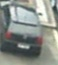

In [150]:
frame = cv2.imread('/content/2012-12-11_17_01_09#016.jpg')
cv2_imshow(frame)